In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [3]:
airlines=pd.read_excel("Airlines+Data.xlsx")
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

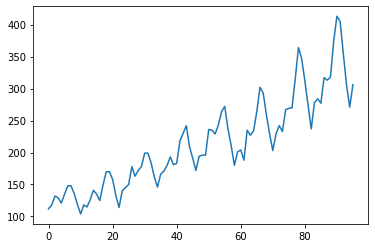

In [4]:
airlines.Passengers.plot() 

In [5]:
#Splitting data to test and train
Train = airlines.head(84)
Test = airlines.tail(12)  

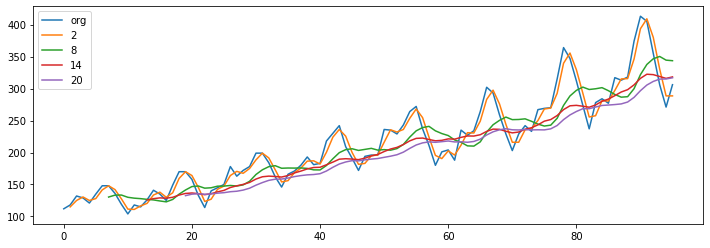

In [6]:
#Moving Average
plt.figure(figsize=(12,4))
airlines.Passengers.plot(label="org")
for i in range(2,24,6):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

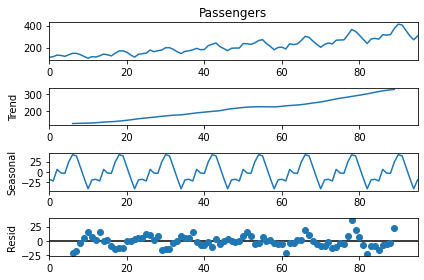

In [7]:
#Time series decomposition plot
decompose_ts_add = seasonal_decompose(airlines.Passengers,period=12)
decompose_ts_add.plot()
plt.show() 

In [8]:
#ACF and PACF plots

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots

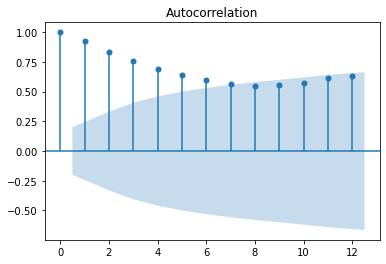

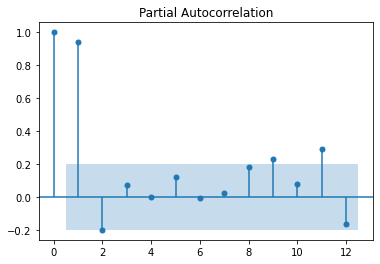

In [10]:
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers,lags=12)
plt.show() 

In [11]:
#Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)  

In [12]:
#Simple Exponential Method
Train["Passengers"] = Train["Passengers"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)  

<ipython-input-12-db0916a6520a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Passengers"] = Train["Passengers"].astype('double')
C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


13.411274740513823

In [13]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-13-31e8e28b1106>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


23.530719652100696

In [14]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


5.500223404459323

In [15]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)  

C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


2.821078114635888

In [16]:
#Final model by combining test and train data
airlines["Passengers"] = airlines["Passengers"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(airlines["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()   

C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [17]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)  

96     312.899621
97     308.171842
98     355.533280
99     345.770538
100    345.696942
101    392.471843
102    436.502723
103    429.860774
104    380.174082
105    332.318802
dtype: float64